In [23]:
import pandas as pd
import matplotlib.pyplot as plt

#### Getting data

Reading data with sentiment analysis

In [8]:
gw_sent=pd.read_csv('data/sentiment_analysis/global_warming_sent.csv',index_col='Unnamed: 0')
ab_sent=pd.read_csv('data/sentiment_analysis/abortion_sent.csv',index_col='Unnamed: 0')
#gi_sent=pd.read_csv('data/sentiment_analysis/gender_inequality_sent.csv',index_col='Unnamed: 0')
#gc_sent=pd.read_csv('data/sentiment_analysis/gun_control_sent.csv',index_col='Unnamed: 0')

In [19]:
#Adding year column
gw_sent['year']=gw_sent['date'].apply(lambda x: x.split('-')[0])
ab_sent['year']=ab_sent['date'].apply(lambda x: x.split('-')[0])
#gi_sent['year']=gi_sent['date'].apply(lambda x: x.split('-')[0])
#gc_sent['year']=gc_sent['date'].apply(lambda x: x.split('-')[0])

Reading data with speakers attributes

In [9]:
gw=pd.read_csv('data/attributes/global_warming.csv',index_col='Unnamed: 0')
ab=pd.read_csv('data/attributes/abortion.csv',index_col='Unnamed: 0')
#gi_sent=pd.read_csv('data/sentiment_analysis/gender_inequality_sent.csv',index_col='Unnamed: 0')
#gc_sent=pd.read_csv('data/sentiment_analysis/gun_control_sent.csv',index_col='Unnamed: 0')

#### Analysis over the data

###### Global warming

In [21]:
gw_sent.head()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores,year
Unnamed: 0,,,,,,,,,,
271,2019-01-07-043005,It [ the BAP ] primarily provides the strategi...,None,[],2019-01-07 08:42:18,"[['None', '0.9189'], ['Rodrigo Duterte', '0.08...",0.094,0.0,0.3818,2019
748,2019-01-14-004682,Ananth has played an important role in making ...,Ananth Narayanan,['Q43384585'],2019-01-14 05:30:00,"[['Ananth Narayanan', '0.6639'], ['None', '0.3...",0.221,0.0,0.7003,2019
1218,2019-03-28-008213,As far as temperature forecasts in the coming ...,Khalid Mehmood,['Q24006135'],2019-03-28 14:05:53,"[['Khalid Mehmood', '0.5785'], ['None', '0.421...",0.058,0.0,0.4194,2019
1933,2019-07-22-037315,Malcolm is the right person at the right time ...,Linda Church,['Q6551474'],2019-07-22 16:50:00,"[['Linda Church', '0.6784'], ['None', '0.3216']]",0.309,0.0,0.9231,2019
2181,2019-09-25-064241,more work is needed in terms of business actio...,Guido Barilla,['Q3779178'],2019-09-25 19:44:49,"[['Guido Barilla', '0.7506'], ['None', '0.2345...",0.243,0.0,0.7717,2019


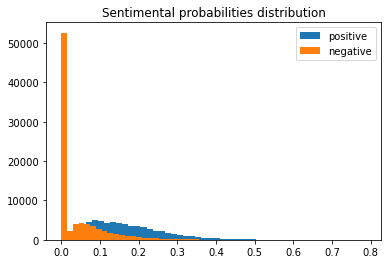

In [58]:
plt.hist(gw_sent['positive scores'],label='positive', bins = 50)
plt.hist(gw_sent['negative scores'],label='negative', bins = 50)
plt.legend()
plt.title('Sentimental probabilities distribution')
None

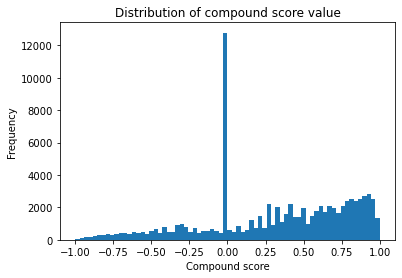

In [55]:
plt.hist(gw_sent['compound scores'],bins=70)
plt.title('Distribution of compound score value')
plt.xlabel('Compound score')
plt.ylabel('Frequency')
None

In [36]:
positive=gw_sent[gw_sent['compound scores']>=0.5]
negative=gw_sent[gw_sent['compound scores']<=-0.5]
neutral=gw_sent[(gw_sent['compound scores']>-0.5) & (gw_sent['compound scores']<0.5)]

In [65]:
neutral.describe()

,positive scores,negative scores,compound scores
count,43941.000000,43941.000000,43941.000000
mean,0.070573,0.041440,0.082269
std,0.075071,0.061672,0.255363
min,0.000000,0.000000,-0.499700
25%,0.000000,0.000000,0.000000
50%,0.062000,0.000000,0.000000
75%,0.113000,0.076000,0.307100
max,0.586000,0.574000,0.499700


In [60]:
positive.describe()

,positive scores,negative scores,compound scores
count,35841.000000,35841.000000,35841.000000
mean,0.218503,0.013451,0.770549
std,0.089275,0.026599,0.136642
min,0.027000,0.000000,0.500000
25%,0.154000,0.000000,0.659000
50%,0.205000,0.000000,0.784500
75%,0.268000,0.017000,0.888500
max,0.787000,0.210000,0.998800


In [61]:
negative.describe()

,positive scores,negative scores,compound scores
count,5581.000000,5581.000000,5581.000000
mean,0.034254,0.193315,-0.693088
std,0.042111,0.085202,0.125620
min,0.000000,0.028000,-0.998500
25%,0.000000,0.134000,-0.790600
50%,0.014000,0.178000,-0.680800
75%,0.061000,0.234000,-0.585900
max,0.275000,0.744000,-0.500000


In [66]:
#TODO: Compare positive,neutral,negative by vizualization

#### Analysis over the years

###### Global warming

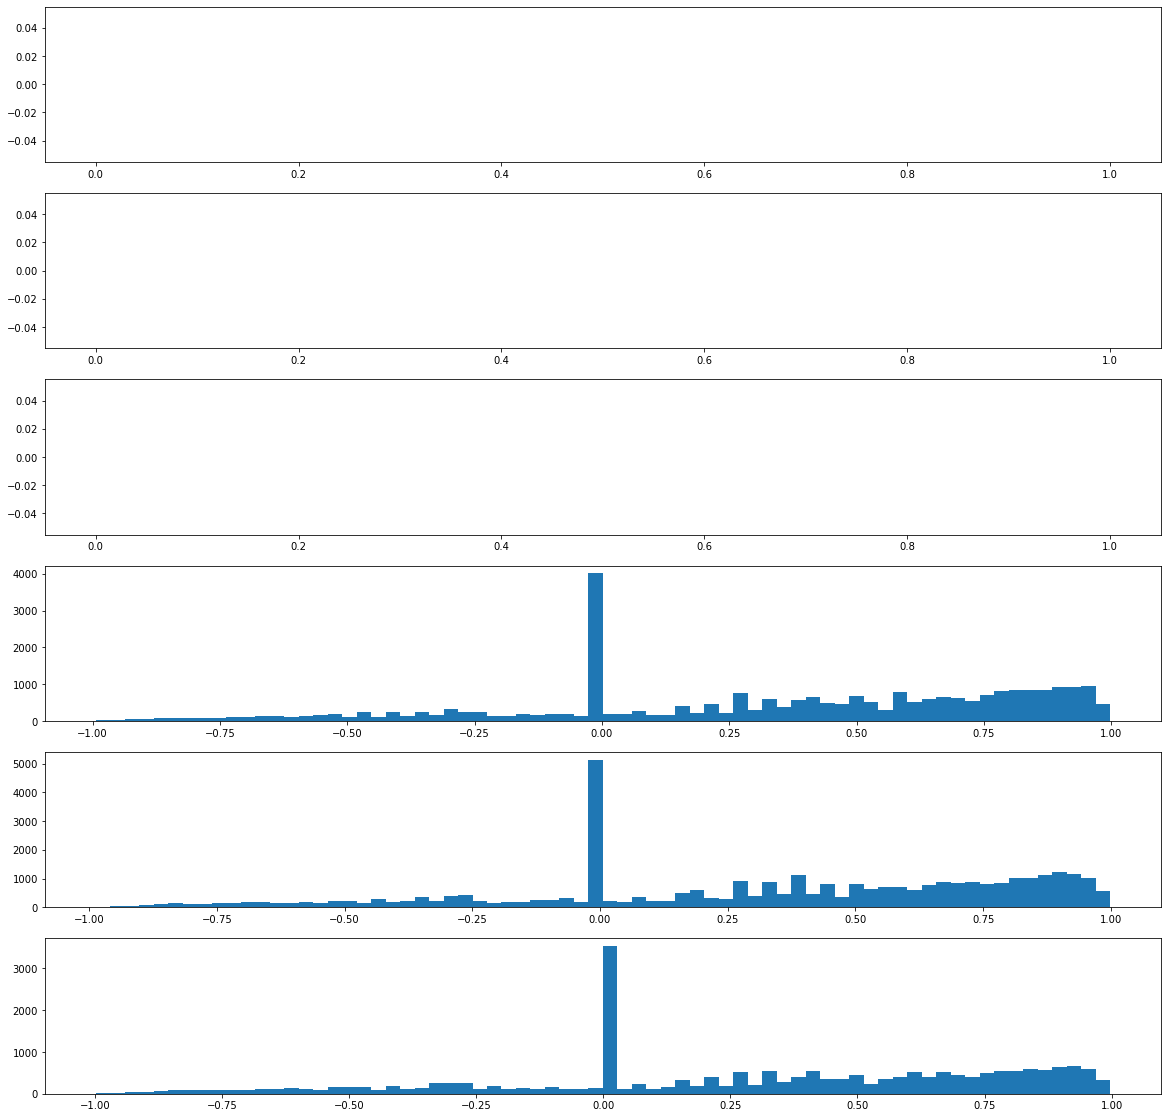

In [90]:
fig, axs = plt.subplots(6,figsize=(20,20))
for i in range(6):
    s=str(2015+i)
    axs[i].hist(gw_sent[gw_sent['year']==s]['compound scores'],bins=70)

In [89]:
gw_sent.groupby('year').count()

,quoteID,quotation,speaker,qids,date,probas,positive scores,negative scores,compound scores
year,,,,,,,,,
2018,27929,27929,27929,27929,27929,27929,27929,27929,27929
2019,35820,35820,35820,35820,35820,35820,35820,35820,35820
2020,21614,21614,21614,21614,21614,21614,21614,21614,21614
